# Aaron Ma

### Location
How Does Location influence Listing Features and Host Decision-Making and Booking Preferences?

#### Key research questions
- What role does instant-bookability serve as an incentive booster for less popular neighbourhoods?
- Is there a difference in host behavior (host identity verified, calculated host listings count) by location?
- Is it 'easier' to be a superhost compared to typical hosts in terms of host behavior and pricing in certain locations?

## EDA

### Imports

In [1]:
import sys
import os

sys.path.append(os.path.abspath("../../code"))

import altair as alt
import pandas as pd

from toolz.curried import pipe

def json_dir(data, data_dir='altairdata'):
    os.makedirs(data_dir, exist_ok=True)
    return pipe(data, alt.to_json(filename=data_dir + '/{prefix}-{hash}.{extension}') )

# Register and enable the new transformer
alt.data_transformers.register('json_dir', json_dir)
alt.data_transformers.enable('json_dir')

# Handle large data sets (default shows only 5000)
# See here: https://altair-viz.github.io/user_guide/data_transformers.html
alt.data_transformers.disable_max_rows()

alt.renderers.enable('jupyterlab')

sys.path.append(os.path.abspath("../../code"))
from cleaning_workflows import prepare_dataset

### Loading in the data

In [2]:
data = pd.read_csv('../../data/raw/listings.csv', parse_dates=['first_review', 'last_review', 'host_since'])

data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,39572,https://www.airbnb.com/rooms/39572,20250103033441,2025-01-03,city scrape,1 br in a 2 br apt (Midtown West),NaN,NaN,https://a0.muscache.com/pictures/fd1bffd9-ccf8...,169927,...,5.00,4.98,4.86,NaN,f,2,1,1,0,0.25
1,39593,https://www.airbnb.com/rooms/39593,20250103033441,2025-01-03,city scrape,A lovely room w/ a Manhattan view,"A private, furnished large room to rent Jan/F...","Nate Silver called this super safe, clean, qui...",https://a0.muscache.com/pictures/0b9110f7-3b24...,110506,...,4.96,4.79,4.93,NaN,f,1,0,1,0,0.20
2,39704,https://www.airbnb.com/rooms/39704,20250103033441,2025-01-03,previous scrape,"Private, Large & Sunny 1BR w/W&D",It's a No Brainer:<br />•Terrific Space For Le...,The Neighborhood<br />• Rich History <br />• B...,https://a0.muscache.com/pictures/0bc4e8a4-c047...,170510,...,4.92,4.38,4.72,NaN,f,2,2,0,0,1.93
3,42300,https://www.airbnb.com/rooms/42300,20250103033441,2025-01-03,city scrape,Beautiful Lower East Side Loft,Architect-owned loft is a corner unit in a bea...,"The apartment is in the border of Soho, LES an...",https://a0.muscache.com/pictures/0e285e13-ee14...,184755,...,4.87,4.57,4.62,NaN,f,1,1,0,0,0.40
4,42729,https://www.airbnb.com/rooms/42729,20250103033441,2025-01-03,city scrape,@HouseOnHenrySt - Private 2nd bedroom w/shared...,NaN,"Lovely old Brooklyn neighborhood, with brick/b...",https://a0.muscache.com/pictures/925fe213-f5e1...,11481,...,4.73,4.58,4.64,NaN,f,4,1,3,0,1.26


In [3]:
data = prepare_dataset(data)

In [4]:
print(data.shape)
print(data.columns)

(37784, 57)
Index(['name', 'description', 'neighborhood_overview', 'host_id', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 57 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   name                                          37784 non-null  object        
 1   description                                   37784 non-null  object        
 2   neighborhood_overview                         37784 non-null  object        
 3   host_id                                       37784 non-null  int64         
 4   host_since                                    37784 non-null  datetime64[ns]
 5   host_location                                 37784 non-null  object        
 6   host_about                                    37784 non-null  object        
 7   host_response_time                            37784 non-null  object        
 8   host_response_rate                            37784 non-null  floa

In [6]:
data.isna().sum()

name                                            0
description                                     0
neighborhood_overview                           0
host_id                                         0
host_since                                      0
host_location                                   0
host_about                                      0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_neighbourhood                              0
host_listings_count                             0
host_total_listings_count                       0
host_verifications                              0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_cleansed                          0
neighbourhood_group_cleansed                    0
latitude                                        0


In [7]:
data.describe().drop(columns=['latitude', 'longitude', 'host_id'])

,host_since,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,37784,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,...,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000
mean,2017-03-06 09:48:26.373067776,0.952508,0.812859,263.054864,351.429229,2.754896,1.119654,1.321723,1.383946,170.434126,...,4.704505,4.870094,4.867555,4.775639,4.676217,71.636354,45.435555,23.985232,0.005187,0.685365
min,2008-08-11 00:00:00,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2014-07-07 00:00:00,1.000000,0.840000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,113.750000,...,4.690000,4.890000,4.900000,4.750000,4.670000,1.000000,0.000000,0.000000,0.000000,0.160000
50%,2016-08-02 00:00:00,1.000000,0.880000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,132.000000,...,4.810000,4.950000,4.960000,4.850000,4.760000,2.000000,1.000000,1.000000,0.000000,0.290000
75%,2019-10-29 00:00:00,1.000000,0.950000,10.000000,15.000000,4.000000,1.000000,1.000000,1.000000,156.000000,...,4.910000,5.000000,5.000000,4.950000,4.850000,9.000000,2.000000,2.000000,0.000000,0.550000
max,2024-12-27 00:00:00,1.000000,1.000000,5079.000000,9048.000000,16.000000,15.500000,16.000000,42.000000,20000.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,1154.000000,1154.000000,739.000000,4.000000,116.300000
std,NaN,0.173547,0.232501,1000.361076,1196.815995,1.903900,0.442243,0.869987,0.984719,277.145183,...,0.423313,0.317409,0.345344,0.331185,0.413567,224.585038,200.899492,109.136674,0.086848,1.584030


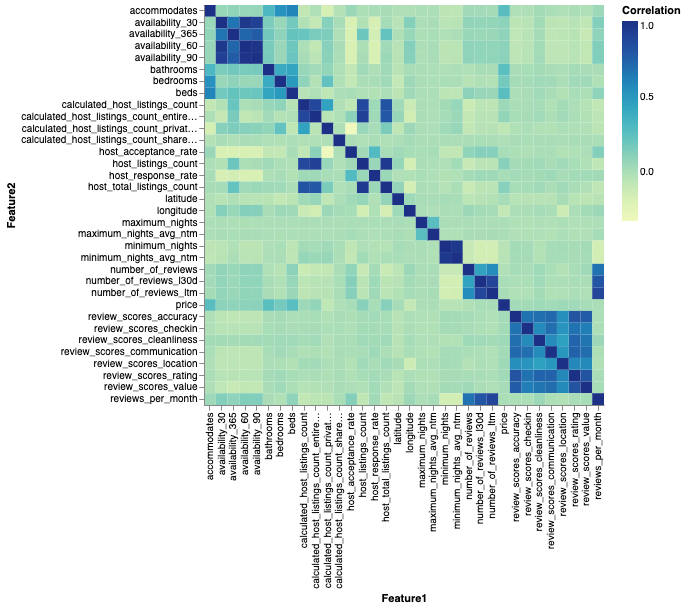

In [8]:
# Filter out non-numeric columns
numerical_df = data.select_dtypes(include=['int64', 'float64'])
numerical_df = numerical_df.drop(columns=['host_id'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Convert the correlation matrix into a long-form DataFrame
corr_df = correlation_matrix.reset_index().melt(id_vars='index')
corr_df.columns = ['Feature1', 'Feature2', 'Correlation']

# Create the heatmap using Altair
heatmap = alt.Chart(corr_df).mark_rect().encode(
    x='Feature1:N',
    y='Feature2:N',
    color='Correlation:Q',
    tooltip=['Feature1', 'Feature2', 'Correlation']
).properties(
    width=400,
    height=400
).configure_view(
    strokeWidth=0  # Remove border around the chart
)

heatmap.show()

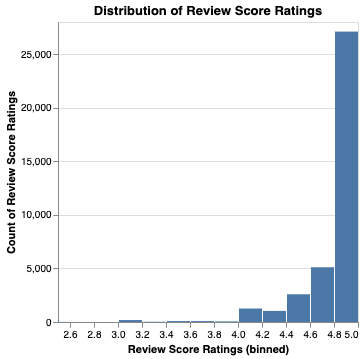

In [17]:
alt.Chart(data).mark_bar().encode(x = alt.X('review_scores_rating', title='Review Score Ratings (binned)', scale=alt.Scale(domain=(2.5, 5), clamp=True)).bin(maxbins=35),
                                  y = alt.Y('count()', title='Count of Review Score Ratings')).properties(title='Distribution of Review Score Ratings')

The distribution above shows a great skew towards the upper end of ratings scores from 4 to 5. There is a small amount of 3 to 3.2 ratings, however, these seem to be the exception/outlier and that the majority of AirBnbs are of good quality.

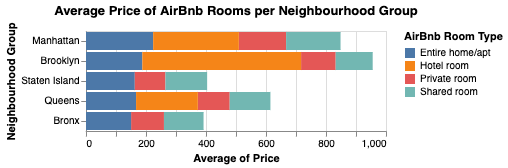

In [16]:
alt.Chart(data).mark_bar().encode(x=alt.X('average(price)', title='Average of Price'), 
                                  y=alt.Y('neighbourhood_group_cleansed', title='Neighbourhood Group', sort='-x'),
                                  color = alt.Color('room_type', title='AirBnb Room Type')).properties(title='Average Price of AirBnb Rooms per Neighbourhood Group')

The visualization above shows that most neighbourhood groups have even distributions of room types with the exception of Brooklyn having a large majority of Hotel rooms. Brooklyn can also be observed to have the most AirBnbs with the Bronx having the least. 

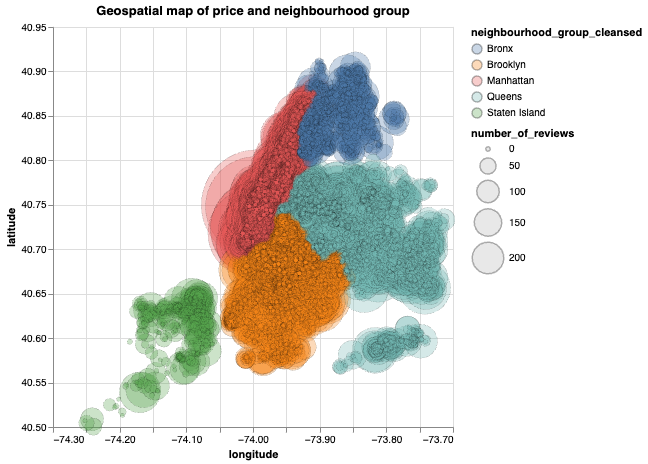

In [11]:
alt.Chart(data).mark_circle(opacity=0.3, stroke='black', strokeWidth=0.3).encode(x=alt.X('longitude', scale = alt.Scale(zero=False)), 
                                    y=alt.Y('latitude', scale = alt.Scale(zero=False)),
                                    size = alt.Size('number_of_reviews', scale = alt.Scale(range=(20, 1000), domain=(0,200))),
                                    color = alt.Color('neighbourhood_group_cleansed'),
                                    order=alt.Order('number_of_reviews', sort='descending')).properties(height=400, 
                                                                                                     width =400, 
                                                                                                     title='Geospatial map of price and neighbourhood group')

Looking at the visualization above, the highest number of reviews seem to be centralized around Manhattan, Queens, and Brooklyn. 

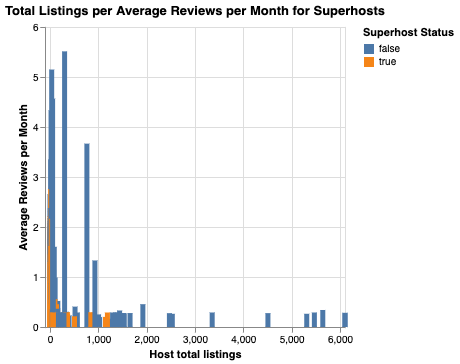

In [12]:
chart = alt.Chart(data).mark_bar().encode(x=alt.X('host_total_listings_count', title='Host total listings', scale = alt.Scale(domain=(1, 6000), clamp=True)), 
                                  y=alt.Y('average(reviews_per_month)', title='Average Reviews per Month', sort = '-x'), 
                                  color=alt.Color('host_is_superhost', title='Superhost Status')).properties(title='Total Listings per Average Reviews per Month for Superhosts')

chart

Looking at the visualization above, we can see that the majority of hosts have less than 500 listings tend to have the highest average reviews per month, ranging from 5 to 5.5 reviews per month. This may indicate that hosts who choose to focus on lower amounts of listings tend to be able to get more reviews for a variety of reasons, greater focus in advertising listings, higher turnover.etc

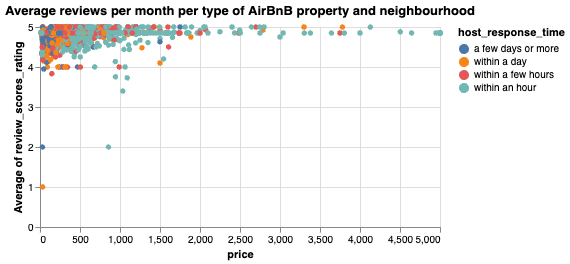

In [13]:
alt.Chart(data).mark_circle().transform_filter(alt.datum.host_response_time != 'No response time'
                                               ).encode(x=alt.X('price', 
                                                                scale = alt.Scale(domain=(0,5000), clamp=True)), 
                                                                y=alt.Y('average(review_scores_rating)'), 
                                                                color=alt.Color('host_response_time')
                                                                ).properties(title='Average reviews per month per type of AirBnB property and neighbourhood', 
                                                                             height=200, 
                                                                             width=400)

Outliers past the price of $8000 were removed. We can see that at high prices, hosts who have fast response times tend to have higher average review score ratings. However, having high response times at all prices is proven to be present at high review score ratings. Another thing that can be observed is the number of slower response times is much more prevalent at lower price levels. This may be an indicator that at lower price levels, host response time is not as impactful of a factor for getting AirBnb users to rent their property. However, at higher price levels, the smaller set of points, and fast response time dominance seem to suggest that it is a requirement to have at higher price levels perhaps even attract users.

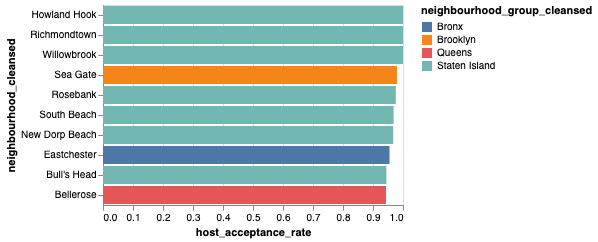

In [14]:
top_neighbourhoods = (data.groupby(["neighbourhood_cleansed", "neighbourhood_group_cleansed"])['host_acceptance_rate']
                      .mean()
                      .nlargest(10)
                      .reset_index())

alt.Chart(top_neighbourhoods).mark_bar().encode(x= 'host_acceptance_rate',
                                   y= alt.Y('neighbourhood_cleansed', sort='-x'),
                                   color = 'neighbourhood_group_cleansed')

The above visualization shows that Staten island has the most neighbourhoods that have hosts that accept over 90% AirBnb users. Moreover, Staten Island is the single neighbourhood group that has 3 neighbourhoods that accepts 100% of users. In addition, it demonstrates that outside the most popular neighbourhood groups such as Manhattan and Brooklyn, Staten Island is the least competitive area to host AirBnbs according to users.

## Task Analysis

### **1. What role does instant-bookability serve as an incentive booster for less popular neighbourhoods?**
- **Retrieve Value**: Extract `neighbourhood_cleansed`, `instant_bookable`, `number_of_reviews`, and `price`
- **Filter**: Filter for less popular neighborhoods using count of listings per neighbourhood
- **Label**: Add tags for less popular and more popular neighbourhoods
- **Calculate**: Use `number_of_reviews` to infer average booking rates
- **Analyze**: Compare average booking rates with instant_bookable groups
- **Visualize**: Visualize different groups

---

### **2. Is there a difference in host behavior (host identity verified, calculated host listings count) by location?**
- **Retrieve Value**: Extract `host_identity_verified`, `calculated_host_listings_count`, `neighbourhood_cleansed`,  and `neighbourhood_group_cleansed`
- **Group**: Group by `neighbourhood_group_cleansed` and `neighbourhood_cleansed`
- **Aggregate**: Calculate average for `calculated_host_listings_count` and count/mode for `host_identity_verified`
- **Analyze**: Analyze relationships between groups
- **Visualize**: Visualize different groups and juxtapose differences between `neighbourhood_group_cleansed`

---

### **3. Is it 'easier' to be a superhost compared to typical hosts in terms of host behavior and pricing in certain locations?**
- **Retrieve Value**: Extract `host_is_superhost`, `neighbourhood_group_cleansed`, `calculated_host_listings_count`, `host_identity_verified`, `host_has_profile_pic`, `host_response_time`, `host_response_rate`, and, `price`
- **Group**: Group by `host_is_superhost` and `neighbourhood_group_cleansed`
- **Aggregate**: Caculate averages of `price`, `host_response_rate`, `host_response_time`, `calculated_host_listings_count`. Calculate counts of `host_has_profile_pic`, and `host_identity_verified`
- **Analyze**: Analyze relationships between groups
- **Visualize**: Visualize different groups and facet by feature

---